In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [5]:
DATA_PATH = os.path.join(os.getcwd(),'data','Social_Network_Ads.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


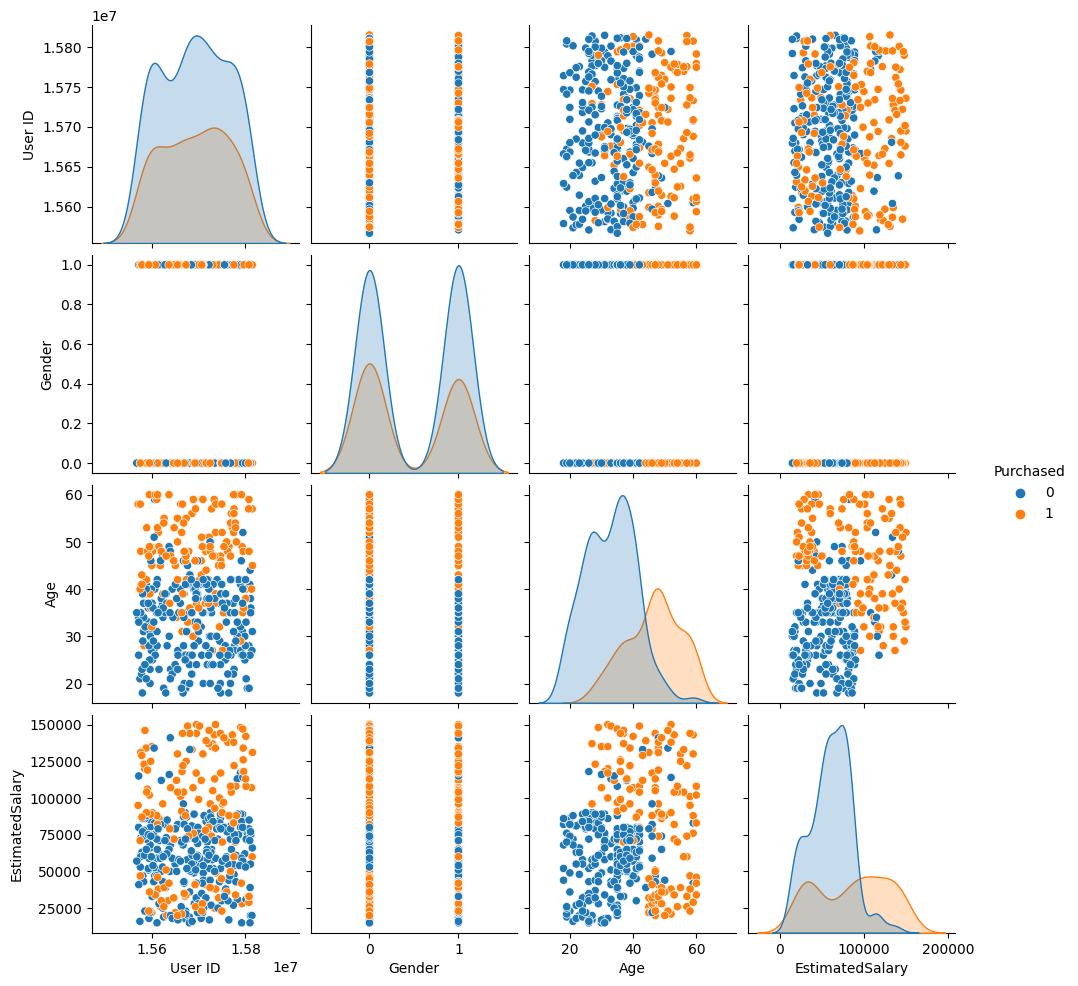

In [40]:
sns.pairplot(df,hue='Purchased');

In [16]:
x = df.drop(['User ID','Purchased'],axis=1)

In [17]:
y = df['Purchased']

In [20]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


### Encode X , Two Value , Have Mening  , Nominal -->  LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lenc = LabelEncoder()
x['Gender'] = lenc.fit_transform(x['Gender'])

In [26]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


### Spliting Data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
x_scl = StandardScaler().fit_transform(x)

In [50]:
train_x,test_x,train_y,test_y = train_test_split(x_scl,y,test_size=0.2,shuffle=True)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()

In [78]:
clf.fit(train_x,train_y)

train_y_predict = clf.predict(train_x)
test_y_predict = clf.predict(test_x)
test_y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [92]:
train_y_predict

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

#### Model Accuracy - Evaluation

In [94]:
from sklearn.metrics import confusion_matrix,

In [95]:
confusion_matrix(train_y,train_y_predict)

array([[196,  14],
       [ 37,  73]], dtype=int64)

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

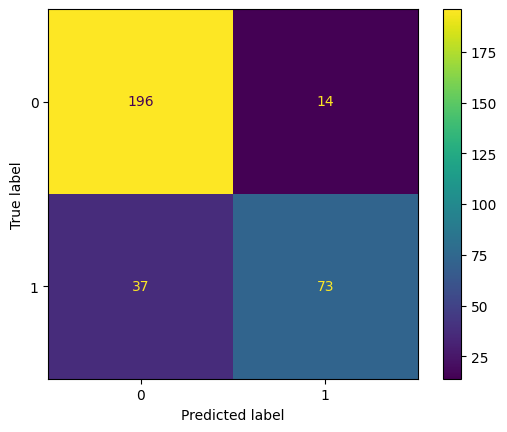

In [107]:
ConfusionMatrixDisplay(confusion_matrix(train_y,train_y_predict)).plot()

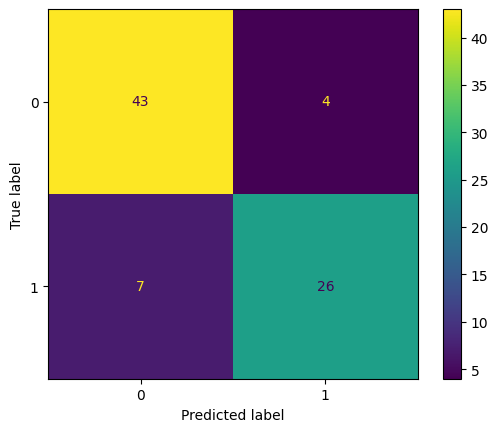

In [108]:
ConfusionMatrixDisplay(confusion_matrix(test_y,test_y_predict)).plot()

#### Accuracy

In [109]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [111]:
accuracy_score(train_y,train_y_predict)

0.840625

In [112]:
accuracy_score(test_y,test_y_predict)

0.8625

In [113]:
recall_score(train_y,train_y_predict)

0.6636363636363637

In [114]:
recall_score(test_y,test_y_predict)

0.7878787878787878

In [115]:
precision_score(train_y,train_y_predict)

0.8390804597701149

In [116]:
precision_score(test_y,test_y_predict)

0.8666666666666667